In [1]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the dataset
dataset=pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [3]:
dataset

neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.136319                0.304818         Earth   
3                     0.198863                0.444672         Earth   
4                     0.076658                0.171412         Earth   
...                        ...                     ...           ...   
338194                0.005112                0.011430         Earth   
338195                0.004859                0.010865         Earth   
338196                0.109839                0.245607         Earth   
338197                0.044377                0.099229         Earth   
338198                0.068290                0.152700         Earth   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338199 rows x 9 columns]

In [4]:
datase_info=dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


## Data Preprocessing 

In [5]:
# Code to find the sum of null values in each column of the dataset
null_values_sum = dataset.isnull().sum()
print(null_values_sum)

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64


In [6]:
#Dropping null values
dataset=dataset.dropna()

In [7]:
null_values_sum = dataset.isnull().sum()
print(null_values_sum)

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64


In [8]:
#on closer inspection, we drop irrelevant input feature varaibles 
dataset=dataset.drop(['neo_id','name','orbiting_body'],axis=1)

In [9]:
dataset

absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.011430   
338195              28.690                0.004859                0.010865   
338196              21.919                0.109839                0.245607   
338197              23.887                0.044377                0.099229   
338198              22.951                0.068290                0.152700   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338171 rows x 6 columns]

In [10]:
# Converting is_hazardous from bool to int 
dataset['is_hazardous'] = dataset['is_hazardous'].astype(int)

## EDA 

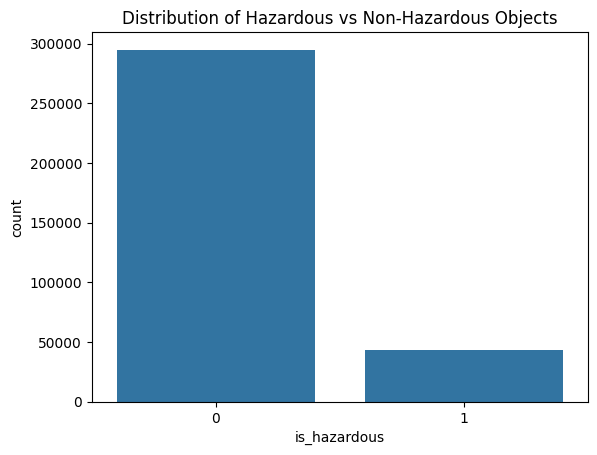

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of the 'is_hazardous' column
sns.countplot(x='is_hazardous', data=dataset)
plt.title('Distribution of Hazardous vs Non-Hazardous Objects')
plt.show()


In [19]:
# Q - What is the proportion of hazardous (1) vs. non-hazardous (0) objects in the dataset?
# Inference of histogram - The number of non-hazardous objects (0) significantly outweighs the number of hazardous objects.Slightly imbalanced data. 

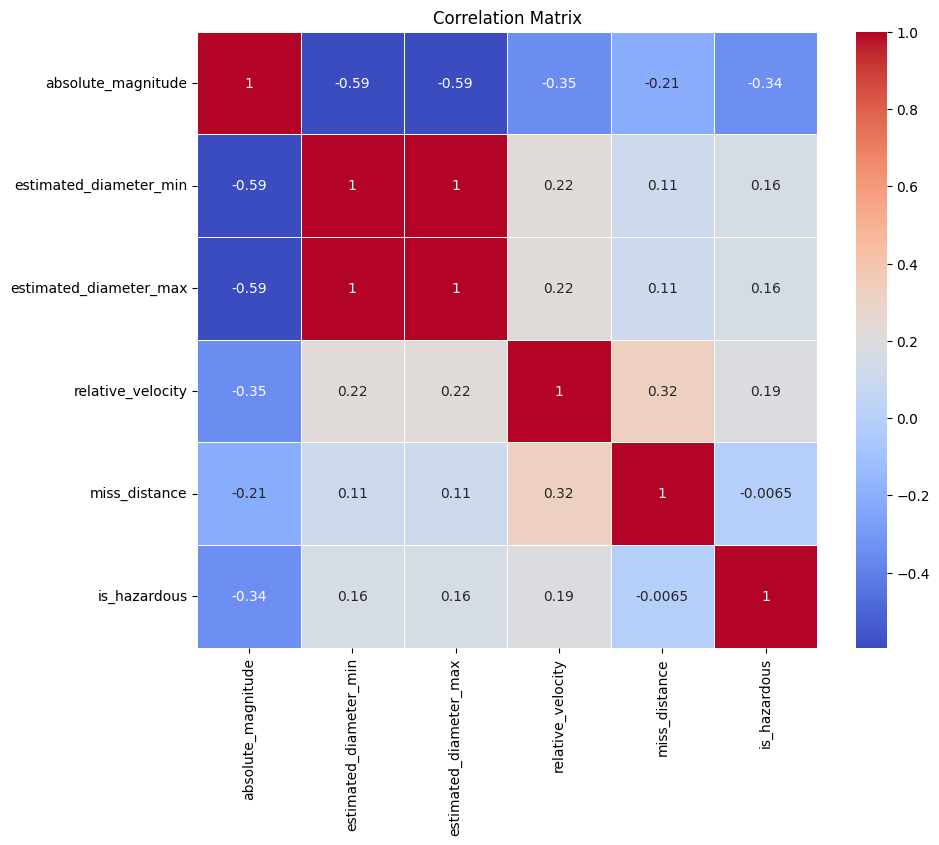

In [12]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [20]:
# Which features are highly correlated with each other?
# Inference of correlation matrix: Magnitude and estimated diameter are the most correlated features with is_hazardous, implying that these could be significant features in the predictive model.
#The perfect correlation between estimated_diameter_min and estimated_diameter_max suggests that you might want to use only one of these in your model to avoid redundancy.
#The weak correlations across most features indicate that no single feature strongly predicts whether an object is hazardous, so a combination of features will likely be necessary for an effective predictive model.

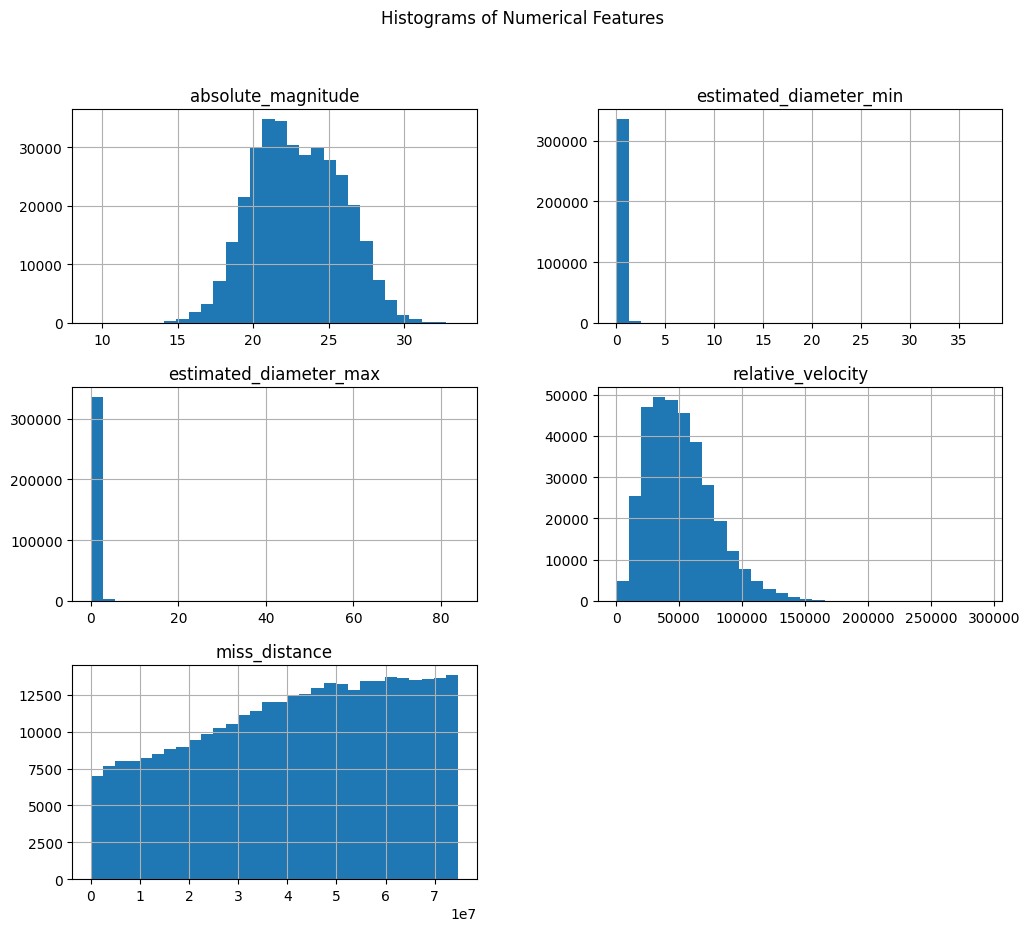

In [23]:
# Histograms of key numerical features
numerical_features = ['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance']

dataset[numerical_features].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

In [25]:
#What are the distributions of key numerical features? How do they impact the classification of an object as hazardous or not hazardous?
#For predicting whether an NEO is hazardous:
#Larger diameters, higher velocities, and smaller miss distances would generally increase the potential hazard.
#The combination of these factors, rather than any single attribute, is typically used to assess potential hazards.

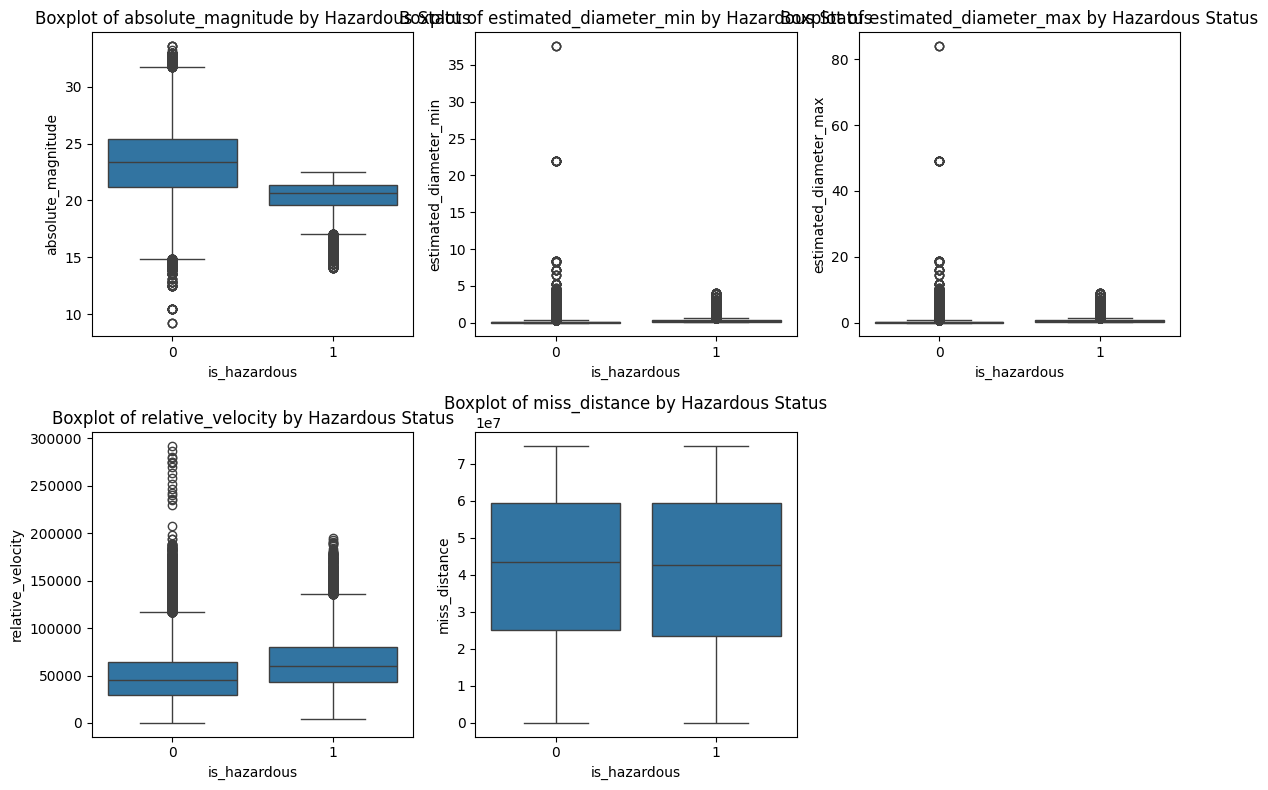

In [21]:
# Boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_hazardous', y=feature, data=dataset)
    plt.title(f'Boxplot of {feature} by Hazardous Status')
plt.tight_layout()
plt.show()


In [22]:
#boxplot inference:
#Absolute Magnitude and Relative Velocity are important features to consider when predicting the hazardous status of an object. Hazardous objects tend to have lower absolute magnitudes (brighter/larger) and higher relative velocities.
#Estimated Diameter also shows a slight difference, with hazardous objects being slightly larger on average.
#Miss Distance does not show a clear pattern or significant difference between hazardous and non-hazardous objects, so it may be less useful as a predictor in your model.

## Segregating independent and dependent Variables and applying standard scaler method

In [14]:
indep=dataset[["absolute_magnitude","estimated_diameter_min","estimated_diameter_max", "estimated_diameter_max", "relative_velocity", "miss_distance"]]
dep=dataset["is_hazardous"]

In [15]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)